In [2]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

In [3]:
all_order_train = pd.read_pickle('../all_order_train.pkl')
all_order_test = pd.read_pickle('../all_order_test.pkl')
print(all_order_train.shape, all_order_test.shape)

all_order_train.head()

(33720820, 12) (98286, 12)


,order_id,user_id,order_number,order_hour_of_day,product_id,purchase_date,merchant,product_name,price,aisle,department,week_number
0,2539329,1,1,8,196,2019-02-13,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages,7
1,2231262,31,17,11,196,2019-03-10,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages,10
2,3058369,195,34,10,196,2019-02-25,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages,9
3,2257155,951,3,20,196,2019-03-09,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages,10
4,1121647,992,7,10,196,2019-03-08,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages,10


In [4]:
sample_merchant_train = all_order_train.loc[all_order_train['merchant']=='49th Parallel Grocery']
print(sample_merchant_train.shape)
sample_merchant_test = all_order_test.loc[all_order_test['merchant']=='49th Parallel Grocery']
print(sample_merchant_test.shape)

sample_merchant_train.head()

(1365312, 12)
(3850, 12)


,order_id,user_id,order_number,order_hour_of_day,product_id,purchase_date,merchant,product_name,price,aisle,department,week_number
705698,2452257,7,20,9,47272,2019-04-04,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,14
705699,1867977,2850,19,10,47272,2019-03-14,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,11
705700,2879669,18719,1,23,47272,2019-02-23,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,8
705701,252427,38924,5,13,47272,2019-03-31,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,13
705702,1252985,55521,6,16,47272,2019-02-23,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,8


In [9]:
sample_prod_train = sample_merchant_train[['product_name', 'price', 'aisle']].drop_duplicates()
sample_prod_test = sample_merchant_test[['product_name', 'price', 'aisle']].drop_duplicates()
sample_prod_df = sample_prod_train.append(sample_prod_test).drop_duplicates()

print(sample_prod_train.shape, sample_prod_test.shape, sample_prod_df.shape)

sample_prod_df = sample_prod_df.sort_values(by='price', ascending=False)
sample_prod_df.head(n=10)

(37655, 3) (2281, 3) (37686, 3)


,product_name,price,aisle
32392358,Boneless Center Cut Pork Loin Chops,59.99,meat counter
33015477,Scotch Reserve Scottish Smoked Salmon,59.87,seafood counter
27293572,Bun Size Franks made with Pork & Chicken,59.80,hot dogs bacon sausage
31303644,Skirt Steak,59.74,meat counter
30562887,Authentic Liver Sausage Braunschweiger,59.59,hot dogs bacon sausage
32894906,Hot Smoked Sausage,59.50,hot dogs bacon sausage
30868245,Grilled And Ready Oven Roasted Diced Chicken B...,59.43,packaged poultry
30564055,Beef Mini Bagel Dogs,59.36,hot dogs bacon sausage
31963335,Summer Sausage,59.30,hot dogs bacon sausage
29321890,Classic Bun Length Turkey Franks,59.30,hot dogs bacon sausage


In [11]:
sample_prod_df.loc[sample_prod_df['price'] > 30]['aisle'].value_counts()

ice cream ice                 225
frozen meals                  225
baby food formula             215
hot dogs bacon sausage        159
beers coolers                 106
frozen produce                 89
frozen pizza                   86
frozen appetizers sides        84
frozen breakfast               81
red wines                      66
spirits                        51
frozen vegan vegetarian        50
frozen meat seafood            49
white wines                    46
meat counter                   44
diapers wipes                  43
packaged poultry               43
packaged meat                  41
poultry counter                40
packaged seafood               29
frozen dessert                 29
baby bath body care            28
specialty wines champagnes     27
seafood counter                23
frozen breads doughs           18
frozen juice                    5
baby accessories                5
Name: aisle, dtype: int64

In [89]:
new_sample_merchant_train = sample_merchant_train.loc[(~sample_merchant_train['aisle']\
                                                      .isin(sample_prod_df.loc[sample_prod_df['price'] > 30]['aisle'].values))\
                                                     & (sample_merchant_train['order_hour_of_day'].isin([9, 10]))]

new_sample_merchant_test = sample_merchant_test.loc[(~sample_merchant_test['aisle']\
                                                      .isin(sample_prod_df.loc[sample_prod_df['price'] > 30]['aisle'].values))\
                                                     & (sample_merchant_test['order_hour_of_day'].isin([10, 11, 12, 13, 14, 15, 16, 17, 18]))]

print(new_sample_merchant_train.shape, new_sample_merchant_test.shape)

(197516, 12) (2487, 12)


In [15]:
new_sample_merchant_train.head()

,order_id,user_id,order_number,order_hour_of_day,product_id,purchase_date,merchant,product_name,price,aisle,department,week_number
705698,2452257,7,20,9,47272,2019-04-04,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,14
705699,1867977,2850,19,10,47272,2019-03-14,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,11
705700,2879669,18719,1,23,47272,2019-02-23,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,8
705701,252427,38924,5,13,47272,2019-03-31,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,13
705702,1252985,55521,6,16,47272,2019-02-23,49th Parallel Grocery,Antioxidant Infusions Beverage Malawi Mango,2.03,refrigerated,beverages,8


In [109]:
new_sample_merchant_train.to_pickle('small_buz_train.pkl')
new_sample_merchant_test.to_pickle('small_buz_test.pkl')

In [92]:
ts_daily_train = new_sample_merchant_train[['purchase_date', 'price', 'user_id']]\
          .groupby(['purchase_date'], as_index=True)['price', 'user_id']\
          .agg({'price': 'sum', 'user_id': 'count'})

ts_daily_train = ts_daily_train.rename(index=str, columns={'price': 'purchase_amount', 'user_id': 'client_count'})
print(ts_daily_train.shape)
ts_daily_train.head()

(100, 2)


,purchase_amount,client_count
purchase_date,,
2019-02-11,5646.66,552
2019-02-12,8504.60,860
2019-02-13,10925.96,1085
2019-02-14,15350.00,1483
2019-02-15,15935.58,1521


In [93]:
ts_daily_test = new_sample_merchant_test[['purchase_date', 'price', 'user_id']]\
          .groupby(['purchase_date'], as_index=True)['price', 'user_id']\
          .agg({'price': 'sum', 'user_id': 'count'})

ts_daily_test = ts_daily_test.rename(index=str, columns={'price': 'purchase_amount', 'user_id': 'client_count'})
print(ts_daily_test.shape)
ts_daily_test.head()

(14, 2)


,purchase_amount,client_count
purchase_date,,
2019-05-22,3248.47,313
2019-05-23,3404.65,303
2019-05-24,2961.97,277
2019-05-25,2290.71,227
2019-05-26,2062.31,213


In [108]:
ts_daily_train.to_pickle('ts_daily_smallbuz_train.pkl')
ts_daily_test.to_pickle('ts_daily_smallbuz_test.pkl')

### Popularity Recommendation & Forecast

#### Recommendation

In [94]:
product_values = pd.read_pickle('product_values.pkl')
print(product_values.shape)

product_values.head()

(49019, 5)


,product_id,total_popularity,product_value,avg_daily_sales,product_name
0,24852,6935.67,31742.000,21.52,Banana
1,13176,5385.83,12622.375,12.05,Bag of Organic Bananas
2,21137,3708.33,6519.100,9.38,Organic Strawberries
3,21903,3537.39,15351.590,20.62,Organic Baby Spinach
4,47209,3003.98,6164.910,10.62,Organic Hass Avocado


In [95]:
sample_products_set1 = new_sample_merchant_train['product_id'].unique()
sample_products_set1

array([47272, 29993, 31683, ..., 35022,  5949,  2039], dtype=int64)

In [96]:
recommended_products = product_values.loc[~product_values['product_id'].isin(sample_products_set1)]\
                                     .sort_values(by=['total_popularity', 'product_value'], 
                                                  ascending=[False, False]).head(n=10).reset_index(drop=True)
recommended_products

,product_id,total_popularity,product_value,avg_daily_sales,product_name
0,9076,837.05,2159.22,11.64,Blueberries
1,25890,774.83,1716.54,9.38,Boneless Skinless Chicken Breasts
2,20995,470.49,749.87,8.02,Organic Broccoli Florets
3,24489,447.19,2713.04,30.83,Organic Whole Strawberries
4,17948,426.21,1507.05,17.73,Frozen Organic Wild Blueberries
5,46802,390.59,3185.35,33.53,Pineapple Chunks
6,38293,380.85,3834.20,50.45,Ground Turkey Breast
7,6046,325.63,2087.58,31.63,Boneless Skinless Chicken Breast
8,47672,317.57,2931.14,39.61,Uncured Hickory Smoked Sunday Bacon
9,14678,292.05,469.20,7.82,Organic Frozen Peas


#### Forecasting

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# the logger here is to remove the warnings about plotly
import logging
logger = logging.getLogger('fbprophet.plot')
logger.setLevel(logging.CRITICAL)
from fbprophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [97]:
train1_col = ts_daily_train['purchase_amount']
test1_col = ts_daily_test['purchase_amount']

# Generate logged moving average for both time series sequences
ts_log_train1 = np.log(train1_col)
ts_moving_avg_train1 = ts_log_train1.rolling(window=4,center=False).mean()
ts_log_test1 = np.log(test1_col)
ts_moving_avg_test1 = ts_log_test1.rolling(window=4,center=False).mean()

ts_moving_avg_train1.head(n=10)

purchase_date
2019-02-11          NaN
2019-02-12          NaN
2019-02-13          NaN
2019-02-14     9.156237
2019-02-15     9.415610
2019-02-16     9.672809
2019-02-17     9.964944
2019-02-18    10.221742
2019-02-19    10.524026
2019-02-20    10.683922
Name: purchase_amount, dtype: float64

In [98]:
ts_ma_train1 = pd.DataFrame(ts_moving_avg_train1.copy())
ts_ma_train1['ds'] = ts_ma_train1.index
ts_ma_train1['y'] = ts_moving_avg_train1.values
ts_ma_train1.drop(['purchase_amount'], inplace=True, axis=1)
print(ts_ma_train1.shape)

ts_ma_test1 = pd.DataFrame(ts_moving_avg_test1.copy())
ts_ma_test1['ds'] = ts_ma_test1.index
ts_ma_test1['y'] = ts_moving_avg_test1.values
ts_ma_test1.drop(['purchase_amount'], inplace=True, axis=1)
print(ts_ma_test1.shape)

ts_ma_train1.head()

(100, 2)
(14, 2)


,ds,y
purchase_date,,
2019-02-11,2019-02-11,NaN
2019-02-12,2019-02-12,NaN
2019-02-13,2019-02-13,NaN
2019-02-14,2019-02-14,9.156237
2019-02-15,2019-02-15,9.415610


In [99]:
latest_period = 14
forecast_period = 7

train = ts_ma_train1.tail(n=latest_period)
test = ts_ma_test1.head(n=forecast_period)

print(train.shape, test.shape)

train.head()

(14, 2) (7, 2)


,ds,y
purchase_date,,
2019-05-08,2019-05-08,8.297507
2019-05-09,2019-05-09,8.121593
2019-05-10,2019-05-10,7.911443
2019-05-11,2019-05-11,7.833131
2019-05-12,2019-05-12,7.750597


In [100]:
prophet_model = Prophet(daily_seasonality = True, yearly_seasonality=False, weekly_seasonality=False,
                            seasonality_mode = 'multiplicative', n_changepoints=5,
                            changepoint_prior_scale=0.05, seasonality_prior_scale=0.1)
prophet_model.fit(train)
    
periods = len(test.index)
future = prophet_model.make_future_dataframe(periods=periods)
forecast = prophet_model.predict(future)

print(train.shape, test.shape, forecast.shape)
all_ts = train.append(test).dropna()
selected_forecast = forecast.loc[forecast['ds'].isin(all_ts.index)]
rmse = round(sqrt(mean_squared_error(all_ts['y'].values, selected_forecast['yhat'].values)), 4)
print(rmse)

forecast.head()

(14, 2) (7, 2) (21, 16)
0.6148


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-05-08,7.909794,8.067661,8.342959,7.909794,7.909794,0.037287,0.037287,0.037287,0.037287,0.037287,0.037287,0.0,0.0,0.0,8.204730
1,2019-05-09,7.808478,7.969139,8.245964,7.808478,7.808478,0.037287,0.037287,0.037287,0.037287,0.037287,0.037287,0.0,0.0,0.0,8.099636
2,2019-05-10,7.707161,7.869886,8.129899,7.707161,7.707161,0.037287,0.037287,0.037287,0.037287,0.037287,0.037287,0.0,0.0,0.0,7.994542
3,2019-05-11,7.605939,7.762126,8.029014,7.605939,7.605939,0.037287,0.037287,0.037287,0.037287,0.037287,0.037287,0.0,0.0,0.0,7.889545
4,2019-05-12,7.504717,7.641624,7.916684,7.504717,7.504717,0.037287,0.037287,0.037287,0.037287,0.037287,0.037287,0.0,0.0,0.0,7.784549


In [101]:
exp_forecast = forecast[['ds', 'yhat']]
exp_forecast['y_origin'] = np.exp(exp_forecast['yhat'])
exp_forecast.head()

,ds,yhat,y_origin
0,2019-05-08,8.204730,3658.211839
1,2019-05-09,8.099636,3293.268039
2,2019-05-10,7.994542,2964.731091
3,2019-05-11,7.889545,2669.229721
4,2019-05-12,7.784549,2403.181632


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


(21, 1)


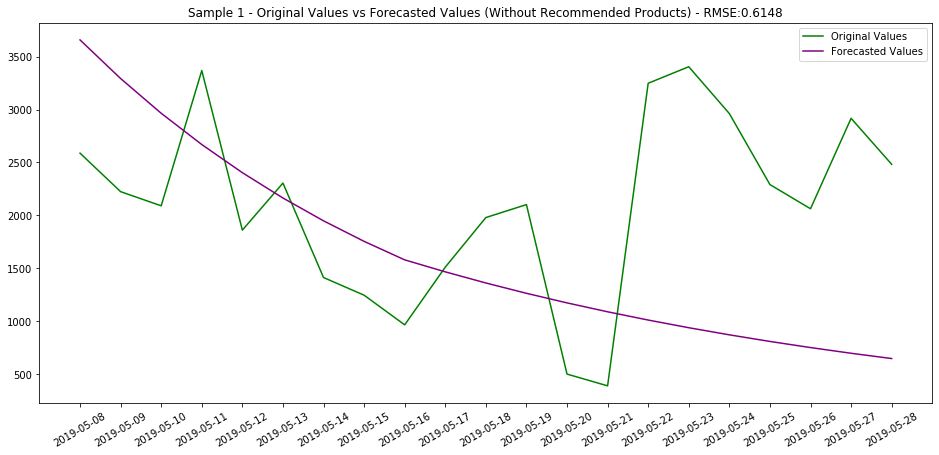

In [106]:
original_ts.index = original_ts.index.astype('str')
exp_forecast['ds'] = exp_forecast['ds'].astype('str')

original_ts = ts_daily_train.iloc[ts_daily_train.index.isin(train.index)][['purchase_amount']]
original_ts = original_ts.append(ts_daily_test.iloc[ts_daily_test.index.isin(test.index)][['purchase_amount']])
print(original_ts.shape)

plt.figure(figsize=(16,7))
plt.plot(original_ts.index, original_ts['purchase_amount'].values, label='Original Values', color='green')
plt.plot(exp_forecast['ds'].values, exp_forecast['y_origin'].values, label='Forecasted Values', color='purple')
plt.legend(loc='best')
plt.title("Sample 1 - Original Values vs Forecasted Values (Without Recommended Products) - RMSE:" + str(rmse))
plt.xticks(rotation=30)
plt.show()

In [103]:
test_ct = 7
daily_sales_increase = 0

original_ts = ts_daily_train.iloc[ts_daily_train.index.isin(train.index)][['purchase_amount']]
original_ts = original_ts.append(ts_daily_test.iloc[ts_daily_test.index.isin(test.index)][['purchase_amount']])
print(original_ts.shape)

exp_forecast['y_forecast'] = exp_forecast['y_origin']
forecast_ts_train = exp_forecast.head(n=latest_period)
forecast_ts_test = exp_forecast.tail(n=forecast_period)

for idx, r in recommended_products.iterrows():
    added_daily_sales = r['avg_daily_sales']
    forecast_ts_test['y_forecast'] += added_daily_sales
    
    daily_sales_increase += added_daily_sales
    
    if idx >= test_ct:
        break

(21, 1)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Total sales increased: 1352.47


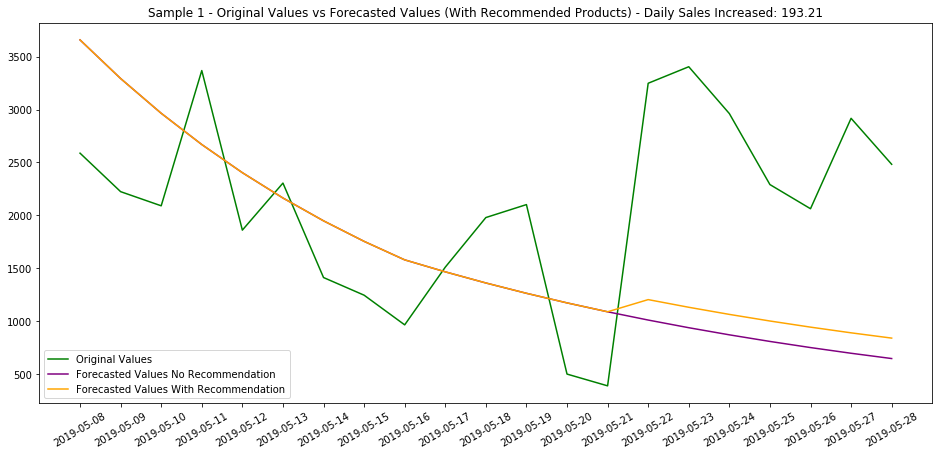

In [107]:
forecast_ts = forecast_ts_train.append(forecast_ts_test)
print('Total sales increased: ' + str(daily_sales_increase * forecast_period))

plt.figure(figsize=(16,7))
plt.plot(original_ts.index, original_ts, label='Original Values', color='green')
plt.plot(exp_forecast['ds'], exp_forecast['y_origin'].values, label='Forecasted Values No Recommendation', color='purple')
plt.plot(forecast_ts['ds'], forecast_ts['y_forecast'].values, label='Forecasted Values With Recommendation', color='orange')
plt.legend(loc='best')
plt.title("Sample 1 - Original Values vs Forecasted Values (With Recommended Products) - Daily Sales Increased: " + str(daily_sales_increase))
plt.xticks(rotation=30)
plt.show()

In [105]:
forecast_ts['daily_diff'] = forecast_ts['y_forecast'] - forecast_ts['y_origin']
forecast_ts['daily_diff_log'] = np.log(forecast_ts['y_forecast']) - forecast_ts['yhat']
forecast_ts

,ds,yhat,y_origin,y_forecast,daily_diff,daily_diff_log
0,2019-05-08,8.204730,3658.211839,3658.211839,0.00,0.000000
1,2019-05-09,8.099636,3293.268039,3293.268039,0.00,0.000000
2,2019-05-10,7.994542,2964.731091,2964.731091,0.00,0.000000
3,2019-05-11,7.889545,2669.229721,2669.229721,0.00,0.000000
4,2019-05-12,7.784549,2403.181632,2403.181632,0.00,0.000000
5,2019-05-13,7.679552,2163.651200,2163.651200,0.00,0.000000
6,2019-05-14,7.574556,1947.995296,1947.995296,0.00,0.000000
7,2019-05-15,7.469560,1753.834314,1753.834314,0.00,0.000000
8,2019-05-16,7.364563,1579.025784,1579.025784,0.00,0.000000
9,2019-05-17,7.290090,1465.702353,1465.702353,0.00,0.000000


## Summary

* Now the daily forecasted increase looks obvious but the forecasting looks bad...
* A better way is to show numbers instead of daily visualization.